# 2 csatornás képek

In [ ]:
#2 csatornás kép betöltése

import matplotlib.pyplot as plt
from skimage import io
import numpy as np


#load
path="data/single/JNK1B2_1.tif"
img = io.imread(path)
#load részeként: ellenőrzi, hogy a channelek milyen sorrendben vannak, és rendezi
if img.shape[0] <6:
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 0, 1)
if img.shape[1] <6:
    img = np.swapaxes(img, 1, 2)


#print
channels=img.shape[-1]

for i in range(channels):
    plt.subplot(1, channels, i+1)
    plt.imshow(img[:,:,i], cmap="gray") 
    plt.axis("off")
    
    
print(img.shape)

In [ ]:
#2 csatornás kép betöltése class segítségével 2 képre

from Classes import cellImageAnalysis as ca
import matplotlib.pyplot as plt
from skimage import io

img = ca.Image("data/single/JNK1B2_1.tif")
img.load_image()
img.display_image()

# sejtkontúrok

In [ ]:
#példa a sejtek kontúrjának megtalálásához

import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from Classes import cellImageAnalysis as ca
from skimage.morphology import erosion
from skimage.morphology import disk  # szükséges az erosion mértékéhez

path="data/single/JNK1B2_1.tif"

img = ca.Image(path)
img.load_image()
detector = ca.Detector(cell_channel=0)
labels = detector.detect_cells(img.image)

footprint = disk(5)
#footprint számadat megadja a membrán vastagságát

cellb=[[]]
#betesszük egy listába az adott sejtet
#kivonjuk belőle az erodált mását (true-fals miatt boolean operátor!)

for i in range(labels.max()):
    cellb[i]=labels==i
    cellb[i]= cellb[i]^erosion(labels==i,footprint)
    break

#a listákat numpy array-é alakítjuk
#shape varázslás
cellb=np.array(cellb)
cellb = np.swapaxes(cellb, 0, 2)
cellb = np.swapaxes(cellb, 0, 1)

#kirajzolás
plt.axis("off")
plt.imshow(cellb)

In [ ]:
#a probálkozások során kellett
#probléma vizualizálása a szétbontott sejtek kontúrjának megalkotása előtt

from Classes import cellImageAnalysis as ca
import matplotlib.pyplot as plt

path="data/single/JNK1B2_1.tif"

img = ca.Image(path)
img.load_image()
detector = ca.Detector(cell_channel=0)
labels = detector.detect_cells(img.image)


for i in range(labels.max()):
    plt.rcParams['figure.figsize'] = [6,6]
    plt.subplot(5, labels.max()-24, i+1)
    plt.imshow(labels==i+1)
    plt.axis("off")

# 3 képből 1

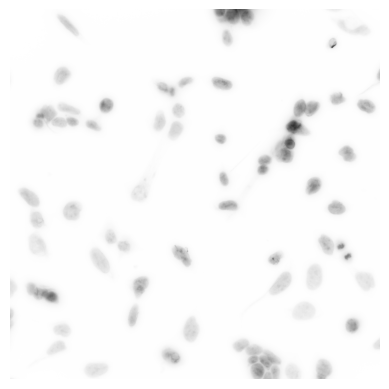

In [2]:
#3 képből egy

from Classes import cellImageAnalysis as ca        
     
#a=ca.XpressImage("data/230309","A04_s45")
a=ca.XpressImage("data/230309","A04_s47")
a.load_ximage()
#a.display_image()
a.display_ximage()

In [4]:
plt.imshow(a.image)

NameError: name 'plt' is not defined

In [ ]:
#save funkció kiírja tiffbe egy megadott elérési útra;
#file névnek automatikusan megkapja a keresett névrészletet
a.save("data/save")

In [ ]:
#a class alapja, már átírva, de így önállóan is működik

from os import listdir
from os.path import isfile, join
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

path="data/230309"
place="A04_s47"

 #leszűrjük, hogy a mappából csak a tif file-okat vizsgáljuk
tifs = [f for f in listdir(path) if isfile(join(path, f)) and  f.endswith(".tif")]

#majd kiválasztjuk belőle a megadott hely alapján a megfelelő fileokat
matches = [match for match in tifs if place in match]

#teljes elérési utat hozunk létre a fileokhoz, 
for i in range(len(matches)):
    matches[i]=join(path,matches[i])
    
#img megkapja az elérési utakat, összerakja az array-t
img = io.imread_collection(matches)
#/65535*255
img = (np.stack(img, axis=2))

#channels=img.shape[-1]

#for i in range(channels):
 #   img[:,:,i]= np.rint((np.clip((img[:,:,i]-img[:,:,i].min()),0,255))).astype(int)

#korábbi próbálkozások; a 3 csatorna min-max értékei nagyon eltérnek, ezért egyenként kell végigmenni rajtuk
#img= np.rint((np.clip((img-img.min()),0,255))).astype(int)
#img[:,:,1]= np.rint((np.clip((img[:,:,1]-img[:,:,1].min()),0,255))).astype(int)

#kirajzolás

plt.axis("off")
plt.imshow(img)

# misc

In [ ]:
#classok megértéséhez segédlet

class Animal:
    
    def __init__(self, birth_date):
        self.birth_date = birth_date
        self.position = 0
        
    def get_age(self):
        return 10
    
    def move(self):
        self.position += 1
        
class Cow(Animal):
    
    def __init__(self, birth_date, milk=None):
        super().__init__(birth_date)
    
    def moo(self):
        print("Moooooo")
        
    def get_age(self):
        return 3